# Функции в Pandas
Примеры из презентации

In [9]:
import pandas as pd

In [10]:
df = pd.DataFrame({'user_id': [1, 2, 3], 'clicks': [163, 130, 97], 'orders': [2, 4, 0]})
df

,user_id,clicks,orders
0,1,163,2
1,2,130,4
2,3,97,0


In [11]:
def watcher(a):
    """Мне только посмотреть"""
    if a == 0:
        return True
    
    return False

Применяем метод apply к одному столбцу. 
Сейчас в переменную функции передаются значения одного столбца

In [12]:
df['watcher'] = df['orders'].apply(watcher)
df

,user_id,clicks,orders,watcher
0,1,163,2,False
1,2,130,4,False
2,3,97,0,True


In [13]:
def conversion(a):
    """Подсчет конверсии переходов в покупки"""
    return a['orders'] / a['clicks']

Применяем метод apply к датафрейму.
В переменную функции передаются строки целиком

In [14]:
df['conversion'] = df.apply(conversion, axis=1)
df

,user_id,clicks,orders,watcher,conversion
0,1,163,2,False,0.012270
1,2,130,4,False,0.030769
2,3,97,0,True,0.000000


### Анализ рекламных кампаний

In [15]:
stats = pd.read_excel('ad_campaigns.xlsx')
stats.head()

,Название группы,Фраза (с минус-словами),Продуктивность,ID объявления,Заголовок,Текст,Ссылка
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...


In [16]:
stats.columns = ['group', 'phrase', 'effect', 'ad_id', 'title', 'text', 'link']
stats.head()

,group,phrase,effect,ad_id,title,text,link
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...


### Lambda-функции
Хотим посчитать распределение количества слов в столбце с фразами

In [17]:
stats['word_count'] = stats['phrase'].apply(lambda x: len(x.split(' ')))
stats.head()


,group,phrase,effect,ad_id,title,text,link,word_count
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,6
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2


In [18]:
# вариант с передачей всей строчки функции
# тут надо обязательно указать параметр axis = 1

stats['word_count'] = stats.apply(lambda x: len(x['phrase'].split(' ')), axis=1)
stats.head()

,group,phrase,effect,ad_id,title,text,link,word_count
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,6
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2


In [19]:
stats['word_count'].value_counts()

3     1129
4      529
2      189
5      137
6       84
7       38
8       30
9       12
10       6
12       2
21       1
17       1
11       1
Name: word_count, dtype: int64

In [20]:
%matplotlib inline

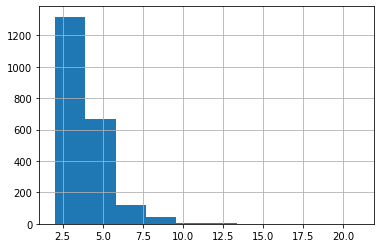

In [21]:
stats['word_count'].hist()

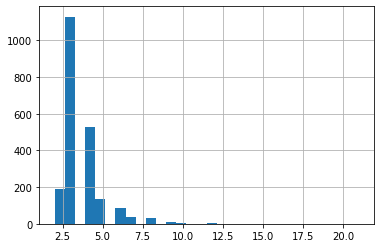

In [22]:
stats['word_count'].hist(bins=30)

### Упражнение
Поисковые запросы с каким количеством слов встречаются в наших данных чаще всего? 
Выведите топ-5

In [23]:
stats['word_count'] = stats['phrase'].apply(lambda x: len(x.split(' ')))
stats.head()
distribution = stats['word_count'].value_counts(dropna=True, ascending=False)
# ddf = stats.groupby('word_count').size()
stats.head()

,group,phrase,effect,ad_id,title,text,link,word_count
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,6
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2


### Произвольные функции
В URL кампаний есть названия. С этим надо что-то делать

In [24]:
# пример ссылки
url = stats.loc[0, 'link']
url

'https://awesome-site.ru/?utm_source=yandex&utm_medium=cpc&utm_campaign=a825749b87&utm_content=dev_{device_type}'

In [25]:
from urllib import parse

In [26]:
parse.urlsplit('https://ya.ru/news/sport?search=footbal')

SplitResult(scheme='https', netloc='ya.ru', path='/news/sport', query='search=footbal', fragment='')

In [27]:
parsed = parse.urlsplit(url)
parsed

SplitResult(scheme='https', netloc='awesome-site.ru', path='/', query='utm_source=yandex&utm_medium=cpc&utm_campaign=a825749b87&utm_content=dev_{device_type}', fragment='')

In [28]:
# можно конечно вручную
parsed.query.split('&')[2].split('=')[1]

'a825749b87'

In [29]:
# как доставать значения

parsed.netloc

'awesome-site.ru'

In [30]:
params = parse.parse_qs(parsed.query)
params

{'utm_source': ['yandex'],
 'utm_medium': ['cpc'],
 'utm_campaign': ['a825749b87'],
 'utm_content': ['dev_{device_type}']}

In [31]:
# вот и кампании

params['utm_campaign'][0]

'a825749b87'

In [32]:
# зачем тут везде списки?

url_with_doubles = 'https://awesome-site.ru/?a=1&a=2&a=3'

parsed = parse.urlsplit(url_with_doubles)
parse.parse_qs(parsed.query)

{'a': ['1', '2', '3']}

In [33]:
# оборачиваем все в функцию
# в качестве аргумента будет строка датафрейма

def campaign_name(row):
    """Получение названия кампании из ссылки внутри строки row"""

    parsed = parse.urlsplit(row['link'])
    params_dict = parse.parse_qs(parsed.query)

    return params_dict['utm_campaign'][0]

In [34]:
stats.head()

,group,phrase,effect,ad_id,title,text,link,word_count
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,6
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2


In [35]:
stats['campaign'] = stats.apply(campaign_name, axis=1)
stats.head()

,group,phrase,effect,ad_id,title,text,link,word_count,campaign
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,a825749b87
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,a825749b87
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,6,a825749b87
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,9cc0c5f6ca
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,9cc0c5f6ca


In [36]:
# как передать несколько аргументов

def power_up(row, n):
    """Возводит значение столбца effect в степень n"""
    return row['effect'] ** n

In [37]:
stats['power_up'] = stats.apply(power_up, n=3, axis=1)
stats.head()

,group,phrase,effect,ad_id,title,text,link,word_count,campaign,power_up
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,a825749b87,91.125
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,a825749b87,91.125
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,6,a825749b87,405.224
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,9cc0c5f6ca,125.000
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,9cc0c5f6ca,125.000


### Упражнение
В наших данных есть много объявлений с услугой МРТ (в названии группы есть слово 'мрт')
 круглосуточно (в тексте объявления есть '24 часа').
  Выделите строки, в которых не упоминается МРТ, но прием идет круглосуточно.
   Сколько таких строк в датасете?

# Группировки

In [38]:
df = pd.DataFrame({'order_id': [1, 2, 3, 4, 5], 'country': ['Россия', 'Китай', 'Китай', 'Россия', 'Россия'], 
                   'category': ['Электроника', 'Авто', 'Электроника', 'Авто', 'Авто'], 
                   'amount': [100, 80, 90, 140, 90]})
df

,order_id,country,category,amount
0,1,Россия,Электроника,100
1,2,Китай,Авто,80
2,3,Китай,Электроника,90
3,4,Россия,Авто,140
4,5,Россия,Авто,90


### Упражнение
Создайте датафрейм df_russia, в котором оставьте заказы из России. И аналогично df_china (заказы из Китая).

### Упражнение
Посчитайте для df_russia и df_china:
- среднюю стоимость заказа
- разницу между максимальной и минимальной стоимостью заказа

Объединим процесс разбиения на датафреймы

In [39]:
def groupby_function(data):
    return data.amount.mean()

In [40]:
df.groupby('country').apply(groupby_function)

country
Китай      85.0
Россия    110.0
dtype: float64

Вернемся к статистике рекламных кампаний

In [41]:
# раньше использовали value_counts

stats['campaign'].value_counts().head()

7f35591a28    456
8e77a0e565    348
2cc2e7d770    240
f6d2ae1e3d    220
e90f4db55a    218
Name: campaign, dtype: int64

In [42]:
# более универсальный способ

stats.groupby('campaign').count().head()

,group,phrase,effect,ad_id,title,text,link,word_count,power_up
campaign,,,,,,,,,
034ada41b6,3,3,3,3,3,3,3,3,3
03fcaecd1d,2,2,2,2,2,2,2,2,2
0697a81555,2,2,2,2,2,2,2,2,2
08cdcb57a3,3,3,3,3,3,3,3,3,3
0f0ba311fb,2,2,2,2,2,2,2,2,2


In [43]:
stats.groupby('campaign').count()[['group', 'effect']].head()

,group,effect
campaign,,
034ada41b6,3,3
03fcaecd1d,2,2
0697a81555,2,2
08cdcb57a3,3,3
0f0ba311fb,2,2


In [44]:
stats.index.values

array([   0,    1,    2, ..., 2156, 2157, 2158], dtype=int64)

### Как вернуть столбец из индекса

In [45]:
stats.groupby('campaign').count().reset_index().head()

,campaign,group,phrase,effect,ad_id,title,text,link,word_count,power_up
0,034ada41b6,3,3,3,3,3,3,3,3,3
1,03fcaecd1d,2,2,2,2,2,2,2,2,2
2,0697a81555,2,2,2,2,2,2,2,2,2
3,08cdcb57a3,3,3,3,3,3,3,3,3,3
4,0f0ba311fb,2,2,2,2,2,2,2,2,2


In [46]:
# тоже самое, что с value_counts

stats.groupby('campaign').count().reset_index().sort_values('group', ascending=False).head() 

,campaign,group,phrase,effect,ad_id,title,text,link,word_count,power_up
62,7f35591a28,456,456,456,456,456,456,456,456,456
69,8e77a0e565,348,348,348,348,348,348,348,348,348
22,2cc2e7d770,240,240,240,240,240,240,240,240,240
110,f6d2ae1e3d,220,220,220,220,220,220,220,220,220
105,e90f4db55a,218,218,218,218,218,218,218,218,218


In [47]:
# но теперь можно менять функции ура

stats.groupby('campaign').sum().sort_values('effect').head()

,effect,ad_id,word_count,power_up
campaign,,,,
63153306ff,2.8,2428554756,4,21.952
f80e902d76,3.3,2101705003,2,35.937
5a7508fa8d,3.5,2428554764,4,42.875
d5b16c7769,3.6,3401169381,4,46.656
7b17b2d188,5.8,2101705006,2,195.112


### Упражнение
Для каждой кампании campaign найдите минимальное значение столбца effect и постройте рейтинг кампаний по этим значениям, начиная с самого низкого.

### Несколько функций в группировках

In [48]:
# задаем несколько функций сразу

stats.groupby('campaign').agg(['min', 'max'])['effect'].head()

,min,max
campaign,,
034ada41b6,4.1,9.0
03fcaecd1d,4.0,6.5
0697a81555,4.0,5.5
08cdcb57a3,5.5,7.4
0f0ba311fb,4.4,6.4


In [49]:
# разные метрики для разных столбцов

stats.groupby('campaign').agg({'effect': ['min', 'max'], 'power_up': 'mean'}).head()

effect         power_up
              min  max        mean
campaign                          
034ada41b6    4.1  9.0  470.682000
03fcaecd1d    4.0  6.5  169.312500
0697a81555    4.0  5.5  115.187500
08cdcb57a3    5.5  7.4  245.991333
0f0ba311fb    4.4  6.4  173.664000

In [50]:
stats.groupby('campaign').agg({'effect': ['min', 'max'], 'power_up': 'mean'})['effect']['max']

campaign
034ada41b6    9.0
03fcaecd1d    6.5
0697a81555    5.5
08cdcb57a3    7.4
0f0ba311fb    6.4
             ... 
f6d2ae1e3d    7.9
f80e902d76    3.3
fbed7afb58    8.6
fe6fa9154a    4.7
fedd9b9cc0    4.6
Name: max, Length: 115, dtype: float64

In [51]:
# группировка по нескольким столбцам

stats.groupby(['group', 'campaign']).count().head()

phrase  effect  ad_id  title  text  link  \
group                campaign                                               
1 5 москва мрт тесла 777160ba51       1       1      1      1     1     1   
                     8e77a0e565       1       1      1      1     1     1   
                     f0079349af       1       1      1      1     1     1   
1 градская мрт       7f35591a28       3       3      3      3     3     3   
1 мрт нагатинский    8e77a0e565       1       1      1      1     1     1   

                                 word_count  power_up  
group                campaign                          
1 5 москва мрт тесла 777160ba51           1         1  
                     8e77a0e565           1         1  
                     f0079349af           1         1  
1 градская мрт       7f35591a28           3         3  
1 мрт нагатинский    8e77a0e565           1         1

In [52]:
# максимальное число объявлений в одной группе

stats.groupby(['group', 'campaign']).count().sort_values('phrase', ascending=False).head()

,,phrase,effect,ad_id,title,text,link,word_count,power_up
group,campaign,,,,,,,,
мрт на алексеевской кулаков переулок 13,7f35591a28,3,3,3,3,3,3,3,3
мрт каширское шоссе,7f35591a28,3,3,3,3,3,3,3,3
мрт кутузовский,7f35591a28,3,3,3,3,3,3,3,3
мрт куркинское шоссе 30,7f35591a28,3,3,3,3,3,3,3,3
мрт куркино,7f35591a28,3,3,3,3,3,3,3,3


### Упражнение
Какая кампания имеет наименьшую сумму по столбцу effect? 

# Агрегированные группировки
Считаем метрики для пользователей, которые выставили 100 и более оценок

In [53]:
ratings = pd.read_csv('ml-latest-small/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### Упражнение
Посчитайте среднее значение Lifetime киноманов 
(пользователи, которые поставили 100 и более рейтингов). 
Под Lifetime понимается разница между максимальным и минимальным значением timestamp для каждого пользователя. Ответ дайте в днях.

In [54]:
ratings.groupby('userId').count().head()

,movieId,rating,timestamp
userId,,,
1,232,232,232
2,29,29,29
3,39,39,39
4,216,216,216
5,44,44,44


In [55]:
ratings_filtered[.... > 100]

SyntaxError: invalid syntax (<ipython-input-55-d4b226f92a1b>, line 1)

In [ ]:
ratings_filtered['userId'].tolist()

In [ ]:
ratings[ ratings['userId'].isin(...) ]


Задание 1
Напишите функцию, которая классифицирует фильмы из материалов 
занятия по следующим правилам:
- оценка 2 и меньше - низкий рейтинг
- оценка 4 и меньше - средний рейтинг
- оценка 4.5 и 5 - высокий рейтинг

Результат классификации запишите в столбец class

In [59]:
import os
import pandas as pd
path = os.path.abspath('')
data_path = os.path.join(path, 'ml-latest-small')
data = pd.read_csv(os.path.join(data_path, 'ratings.csv'))
data_movies = pd.read_csv(os.path.join(data_path, 'movies.csv'))
data_all = data.merge(data_movies, on='movieId', how='right')
data_all = data_all.groupby(['movieId', 'title'])
data_group_by_movie_New = data_all['rating'].mean().to_frame().reset_index()


def classrate(a):
    if a >= 4.5:
        return  'high'
    elif a >= 2 and a < 4.5:
        return 'medium'
    elif a <= 2:
        return  'low'


data_group_by_movie_New['classrate'] = data_group_by_movie_New['rating'].apply(classrate)
data_group_by_movie_New.head()

,movieId,title,rating,classrate
0,1,Toy Story (1995),3.920930,medium
1,2,Jumanji (1995),3.431818,medium
2,3,Grumpier Old Men (1995),3.259615,medium
3,4,Waiting to Exhale (1995),2.357143,medium
4,5,Father of the Bride Part II (1995),3.071429,medium



Задание 2
Используем файл keywords.csv.

Необходимо написать гео-классификатор, который каждой строке сможет выставить
 географическую принадлежность определенному региону. Т. е. если
  поисковый запрос содержит название города региона, то в столбце ‘region’ 
  пишется название этого региона. Если поисковый запрос не содержит названия 
   города, то ставим ‘undefined’.

Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:

geo_data = {

'Центр': ['москва', 'тула', 'ярославль'],

'Северо-Запад': ['петербург', 'псков', 'мурманск'],

'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}

Результат классификации запишите в отдельный столбец region.

In [57]:
import pandas as pd

geo_df = pd.read_csv('keywords.csv')

def geo_control(a):
    geo_data = {

    'Центр': ['москва', 'тула', 'ярославль'],

    'Северо-Запад': ['петербург', 'псков', 'мурманск'],

    'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
    }
    
    words_from_query = a.split()
    
    for i in words_from_query:
        for k, v in geo_data.items():
            if i in v:
                return k
    return 'undefined'

geo_df['region'] = geo_df['keyword'].apply(geo_control)
geo_df.head()
            

,keyword,shows,region
0,вк,64292779,undefined
1,одноклассники,63810309,undefined
2,порно,41747114,undefined
3,ютуб,39995567,undefined
4,вконтакте,21014195,undefined


Задание 3

Есть мнение, что “раньше снимали настоящее кино, не то что сейчас”. Ваша задача проверить 
это утверждение, используя файлы с рейтингами фильмов из материалов занятия.
Т. е. проверить верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

При этом мы не будем затрагивать субьективные факторы выставления этих рейтингов,
а пройдемся по следующему алгоритму:

В переменную years запишите список из всех годов с 1950 по 2010.

Напишите функцию production_year, которая каждой строке из названия фильма выставляет год
выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому
используйте следующий алгоритм:

для каждой строки пройдите по всем годам списка years
если номер года присутствует в названии фильма, то функция возвращает этот год
как год выпуска
если ни один из номеров года списка years не встретился в названии фильма, то 
возвращается 1900 год
Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец ‘year’

Посчитайте средний рейтинг всех фильмов для каждого значения столбца ‘year’
и отсортируйте результат по убыванию рейтинга




In [56]:
import os
import pandas as pd
path = os.path.abspath('')
data_path = os.path.join(path, 'ml-latest-small')
data = pd.read_csv(os.path.join(data_path, 'ratings.csv'))
data_movies = pd.read_csv(os.path.join(data_path, 'movies.csv'))
data_all = data.merge(data_movies, on='movieId', how='right')


years = []
for i in range(1950,2011):
    years.append(str(i))


def production_year(a):
    a = a.replace('(','').replace(')','')

    words_from_name = a.split()
    for i in words_from_name:
            if i in years:
                return i
    return 1900    

data_all['years'] = data_all['title'].apply(production_year)
data_all.head()
data_group_by_year = data_all.groupby(['years'])
data_grouped = data_group_by_year['rating'].mean()
data_grouped.to_frame().reset_index().head()

,years,rating
0,1900,3.538378
1,1950,3.813665
2,1951,3.804945
3,1952,3.953125
4,1953,3.647059
